In [1159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1160]:
df = pd.read_excel("SMS Spam Classification.xlsx")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [1161]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [1162]:
df.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [1163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [1164]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [1165]:
df.shape

(5572, 5)

* There will be 5 stages in which we will work in order to create a Machine Learning Model:
    * Data Cleaning
    * EDA
    * Text Preprocessing
    * Model Building
    * Evaluation


* There are another 3 steps after the model building and evaluation:
    * Improvement of the model(Hyper-Parameter Tuning)
    * Website
    * Deployment

# DATA CLEANING

In [1166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [1167]:
# Check for missing values before cleaning
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [1168]:
# Drop the unnecessary columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'] ,inplace=True)

In [1169]:
df.sample(5)

,v1,v2
3661,ham,"What are you doing in langport? Sorry, but I'l..."
4233,ham,Now only i reached home. . . I am very tired n...
2335,ham,Which is weird because I know I had it at one ...
5239,ham,"Jay wants to work out first, how's 4 sound?"
2256,ham,"Just checked out, heading out to drop off my s..."


In [1170]:
# Rename the Columns
df.rename(columns={'v1':'Target','v2':'text'},inplace=True)

In [1171]:
df.sample(5)

,Target,text
3522,ham,Try neva mate!!
2897,ham,If you r @ home then come down within 5 min
3917,ham,No need to ke qi... ÌÏ too bored izzit y sudde...
1779,spam,"Loan for any purpose å£500 - å£75,000. Homeown..."
1961,ham,LOL that would be awesome payback.


In [1172]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [1173]:
df['Target']=encoder.fit_transform(df['Target'])

In [1174]:
df.head(5)

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [1175]:
#Check for missing values after cleaning
df.isnull().sum()

Target    0
text      0
dtype: int64

In [1176]:
# Check for duplicate values
df.duplicated().sum()

403

In [1177]:
df = df.drop_duplicates(keep='first')

In [1178]:
df.duplicated().sum()

0

In [1179]:
df.isnull().any()

Target    False
text      False
dtype: bool

In [1180]:
df.shape

(5169, 2)

In [1181]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis

In [1182]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

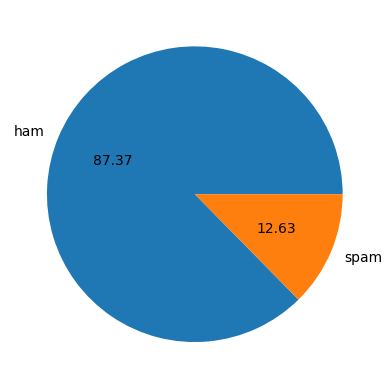

In [1183]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show

**As we can see from the chart that there is huge imbalance in the data.**
* Data is imbalanced 

In [1184]:
import nltk

* The Natural Language Toolkit (nltk) library is a powerful library in Python for working with human language data (text). 
* It provides a suite of tools for tasks such as tokenizing, parsing, classification, stemming, tagging, and more.

* Here are some of the primary functionalities provided by the nltk library:
    * **Tokenization:** Splitting text into individual words or sentences.
        * Example: nltk.word_tokenize splits a sentence into words.

    * **stemming:** Reducing words to their base or root form.
        * Example: nltk.stem.PorterStemmer reduces words like "running" to "run".

    * **Lemmatization:** Similar to stemming but more linguistically accurate, reducing words to their base form.
        * Example: nltk.stem.WordNetLemmatizer reduces "better" to "good".

In [1185]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1186]:
df.loc[:, 'num_characters'] = df['text'].fillna('').astype(str).apply(len)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29396\557443415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_characters'] = df['text'].fillna('').astype(str).apply(len)


In [1187]:
df.head()

,Target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [1188]:
# Ensure 'text' column is converted to strings and handle missing values
df.loc[:, 'text'] = df['text'].fillna('').astype(str)

# Apply word tokenization and count the number of words
df.loc[:, 'num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29396\3584749579.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [1189]:
df.head()

,Target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [1190]:
df.loc[:, 'num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29396\3787824186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [1191]:
df.head()

,Target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


* **Target:**
    * The Target column is mostly zeros, indicating that the target event occurs in about 12.6% of the cases.

* **num_characters:**
    * The texts have an average length of approximately 79 characters, with a wide range from 2 to 910 characters. Most texts are between 36 and 117 characters long.

* **num_words:**
    * The texts contain an average of about 18 words, ranging from 1 to 220 words. The interquartile range (middle 50% of the data) is between 9 and 26 words.

* **num_sentences:**
    * Most texts are short, averaging around 2 sentences, with the majority of texts having between 1 and 2 sentences. The number of sentences ranges from 1 to 38.

* The dataset comprises textual data with a rare target event (approximately 12.6%). 
* Texts are generally short, averaging around 79 characters, 18 words, and 2 sentences. 
* The distributions of num_characters, num_words, and num_sentences show significant variability, with some texts being much longer than others.

In [1192]:
df[df['Target']==0].describe()

,Target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.461913,17.123782,1.820195
std,0.0,56.362288,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [1193]:
df[df['Target']==1].describe()

,Target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


This histogram helps in understanding the distribution and length of texts across different target classes, which can be crucial for further text analysis and preprocessing steps, such as truncating or padding texts for uniformity in machine learning models.

<Axes: xlabel='num_characters', ylabel='Count'>

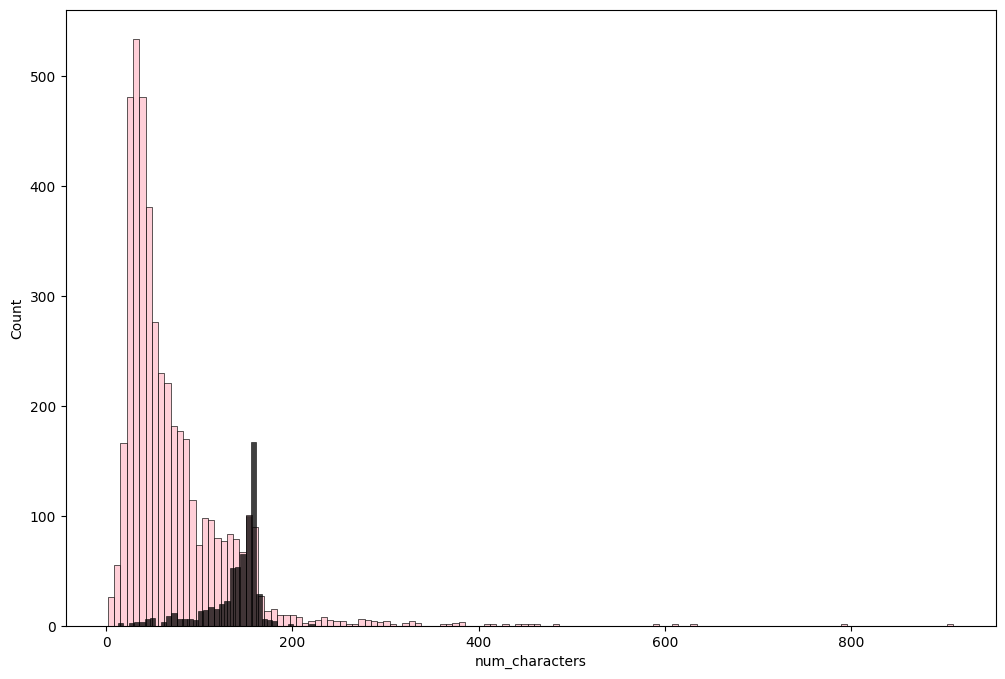

In [1194]:
plt.figure(figsize=(12,8))
# Histogram for number of characters in the ham messages
sns.histplot(df[df['Target']==0]['num_characters'],color='pink')\
# Histogram for number of characters in the spam messages
sns.histplot(df[df['Target']==1]['num_characters'],color='black')

<Axes: xlabel='num_words', ylabel='Count'>

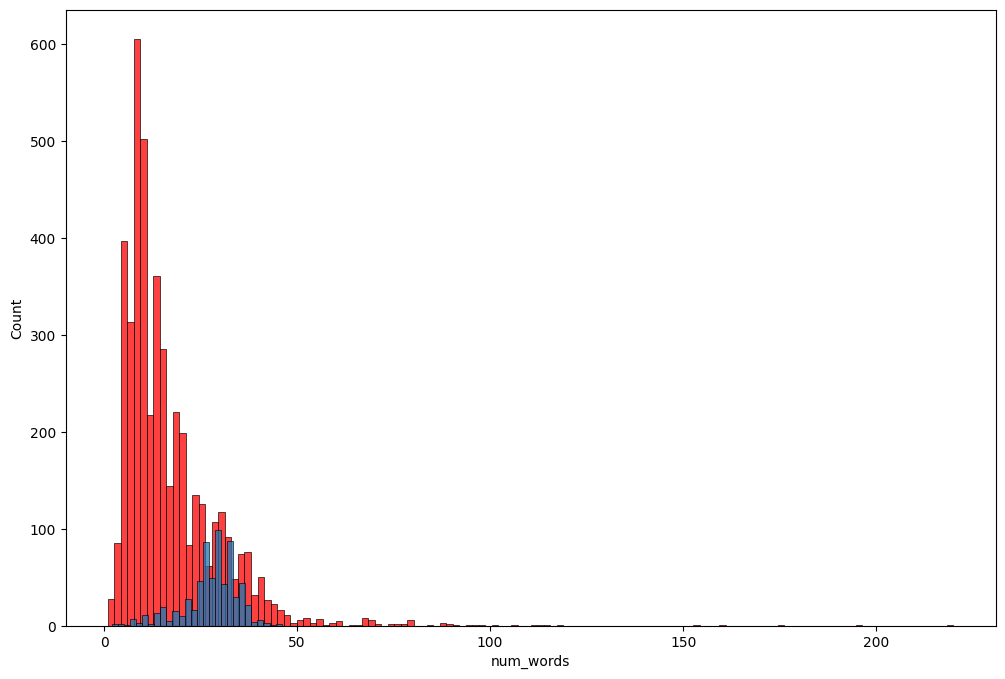

In [1195]:
plt.figure(figsize=(12,8))
# Histogram for number of Words in the ham messages
sns.histplot(df[df['Target']==0]['num_words'],color='red')
# Histogram for number of words in the spam messages
sns.histplot(df[df['Target']==1]['num_words'])

**Imbalance in Target Classes:** There is a significant imbalance between the two classes of the Target variable. Most texts fall into the Target = 0 category.

**Text Length:** The dataset consists mainly of short texts, with both target classes having most of their texts within the 0 to 50 words range. However, the majority of these short texts belong to the Target = 0 category.

**Tail of Distribution:** The long tail suggests a small number of texts have a much higher word count, which might be outliers or specific to certain contexts or types of texts.

<Figure size 1200x800 with 0 Axes>

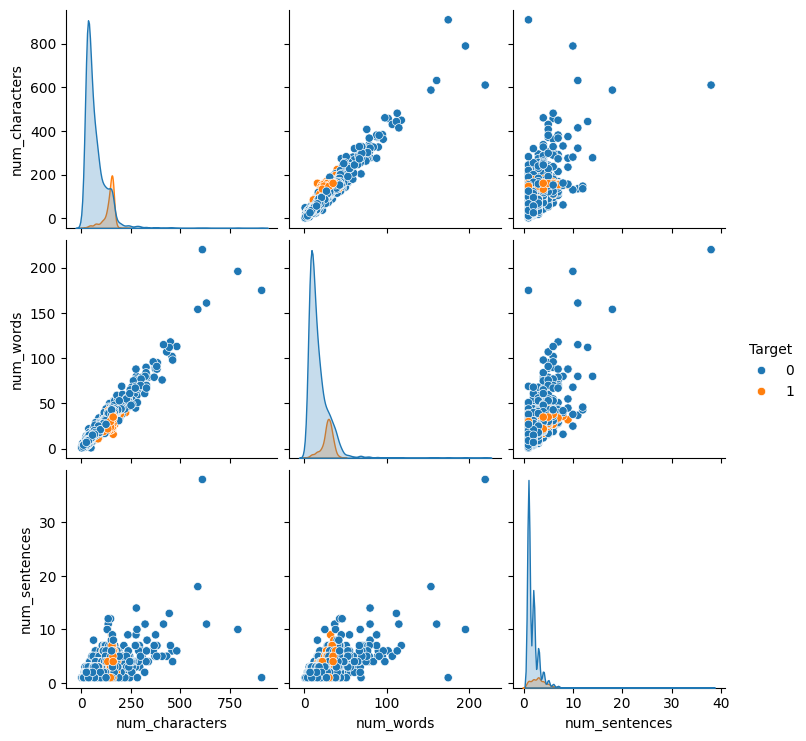

In [1196]:
plt.figure(figsize=(12,8))
sns.pairplot(df,hue='Target')

In [1197]:
numerical_df = df.select_dtypes(include=['number'])
# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
# print(correlation_matrix)


<Axes: >

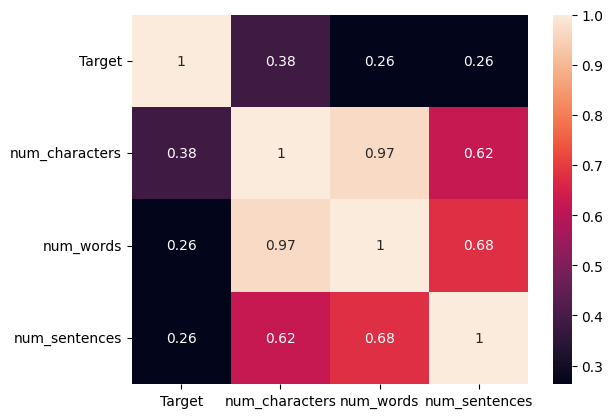

In [1198]:
sns.heatmap(correlation_matrix,annot=True)

* Data Preprocssing
    * Lower Case
    * Tokenization
        * Tokenization is a fundamental step in the preprocessing of text data in Natural Language Processing (NLP). 
        * It involves breaking down a text into smaller units called tokens, which can be words, subwords, or characters. 
        * These tokens are the building blocks used for further text analysis and processing.
    * Removing Special Characters\
    * Removing stop words and punctuation
    * Stemming:
        * Stemming is a text preprocessing technique used in Natural Language Processing (NLP) and text mining.
        * The main goal of stemming is to reduce different forms of a word to a common base or root form. 
        * This process helps in standardizing words that have the same meaning but appear in different forms due to inflectional or derivational variations.

In [1199]:
def Transform_text(text):
    text = text.lower()             #Convert to Lower Case
    text = nltk.word_tokenize(text)     # Tokenize every character
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)    # Removing special characters
    text  = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:   # Removing Stop words and punctuation
            y.append(i)

    text  = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
                           
    return " ".join(y)

In [1200]:
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()
# ps.stem('dancing')

In [1201]:
Transfrom_text("'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'")

'jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [1202]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [1203]:
df['Transform_Text']=df['text'].apply(Transform_text)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29396\3697053424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transform_Text']=df['text'].apply(Transform_text)


In [1204]:
df.head()

,Target,text,num_characters,num_words,num_sentences,Transform_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


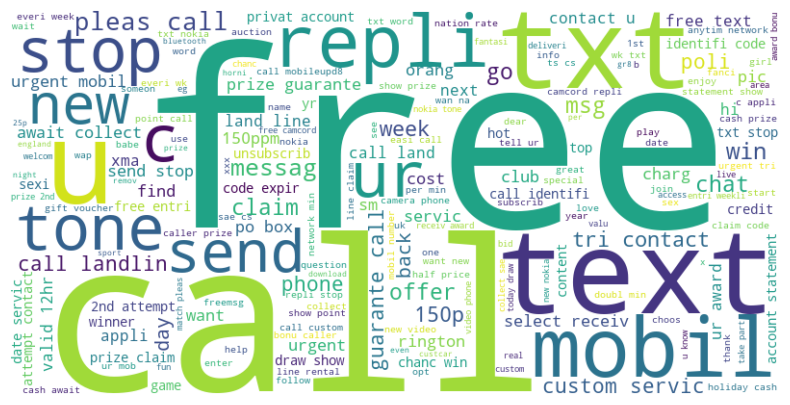

In [1205]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame
spam_text = df[df['Target'] == 1]['Transform_Text'].str.cat(sep=" ")

# Generate word cloud
spam_wc = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


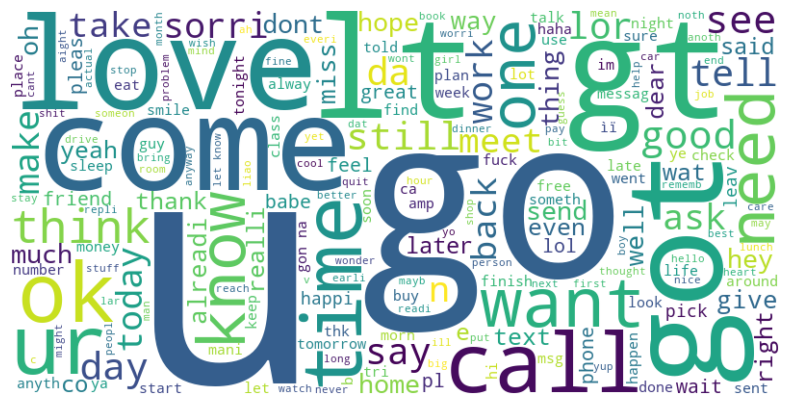

In [1206]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame
ham_text = df[df['Target'] == 0]['Transform_Text'].str.cat(sep=" ")

# Generate word cloud
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [1207]:
df.head()

,Target,text,num_characters,num_words,num_sentences,Transform_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [1208]:
spam_corpus = []
for msg in df[df['Target'] == 1]['Transform_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [1209]:
len(spam_corpus)


9939

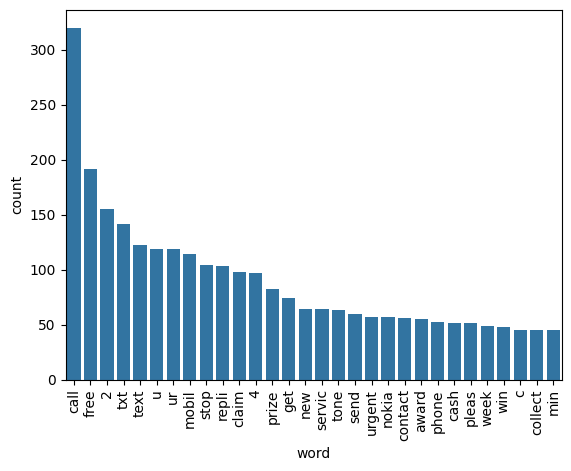

In [1210]:
spam_word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Create a bar plot
sns.barplot(x='word', y='count', data=spam_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [1211]:
spam_corpus = []
for msg in df[df['Target'] == 0]['Transform_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [1212]:
len(spam_corpus)


35402

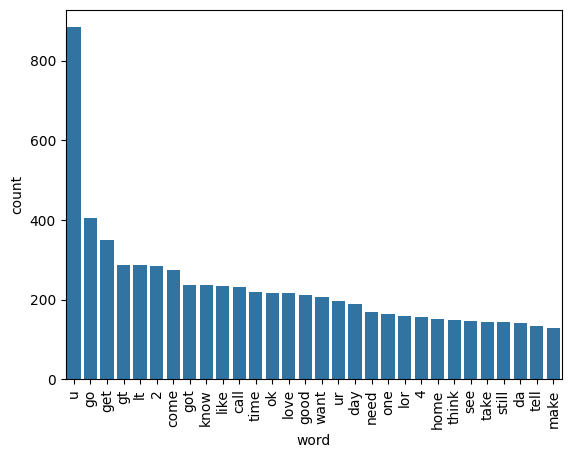

In [1213]:
spam_word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Create a bar plot
sns.barplot(x='word', y='count', data=spam_word_counts)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [1214]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [1215]:
X = cv.fit_transform(df["Transform_Text"]).toarray()

In [1216]:
X.shape

(5169, 6708)

In [1217]:
y = df['Target'].values

In [1218]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [1219]:
from sklearn.model_selection import train_test_split

In [1220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [1221]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [1222]:
gnb  =GaussianNB()
mnb  =MultinomialNB()
bnb = BernoulliNB()

In [1223]:
gnb.fit(X_train,y_train)

GaussianNB()

In [1224]:
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))


0.8800773694390716


In [1225]:
print(confusion_matrix(y_test,y_pred1))

[[792 104]
 [ 20 118]]


In [1226]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [1227]:
y_pred2 = mnb.predict(X_test)
print(f"Model trained with accuracy: {accuracy_score(y_test, mnb.predict(X_test))}")

Model trained with accuracy: 0.9642166344294004


In [1228]:
print(confusion_matrix(y_test,y_pred2))

[[871  25]
 [ 12 126]]


In [1229]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [1230]:
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))

0.9700193423597679


In [1231]:
print(confusion_matrix(y_test,y_pred3))

[[893   3]
 [ 28 110]]


In [1232]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf  = TfidfVectorizer(max_features=3000)

In [1233]:
X = tfidf.fit_transform(df["Transform_Text"]).toarray()

In [1234]:
from sklearn.preprocessing import MinMaxScaler
scalar  = MinMaxScaler()

In [1235]:
X = scalar.fit_transform(X)

In [1236]:
X.shape

(5169, 3000)

In [1237]:
y = df['Target'].values

In [1238]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [1239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [1240]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [1241]:
gnb  =GaussianNB()
mnb  =MultinomialNB()
bnb = BernoulliNB()

In [1242]:
gnb.fit(X_train,y_train)

GaussianNB()

In [1243]:
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print (precision_score(y_test,y_pred1))

0.8752417794970987
[[785 111]
 [ 18 120]]
0.5194805194805194


In [1244]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [1245]:
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print (precision_score(y_test,y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [1246]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [1247]:
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print (precision_score(y_test,y_pred3))

0.9825918762088974
[[895   1]
 [ 17 121]]
0.9918032786885246


In [1248]:
# tfidf --> MNB

In [1249]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [1250]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [1251]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [1252]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [1253]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738878143133463, 0.944)

In [1254]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.944
For  KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For  NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8350515463917526
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9709864603481625
Precision -  0.9655172413793104


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9369369369369369
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8604651162790697
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.9292929292929293
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.9401709401709402


In [1255]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [1256]:
performance_df


,Algorithm,Accuracy,Precision
8,ETC,0.980658,0.983607
1,KN,0.905222,0.976190
5,RF,0.970986,0.965517
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
0,SVC,0.973888,0.944000
10,xgb,0.966151,0.940171
6,AdaBoost,0.960348,0.936937
9,GBDT,0.948743,0.929293
7,BgC,0.956480,0.860465


In [1257]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1


,Algorithm,variable,value
0,ETC,Accuracy,0.980658
1,KN,Accuracy,0.905222
2,RF,Accuracy,0.970986
3,LR,Accuracy,0.967118
4,NB,Accuracy,0.978723
5,SVC,Accuracy,0.973888
6,xgb,Accuracy,0.966151
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.948743
9,BgC,Accuracy,0.956480


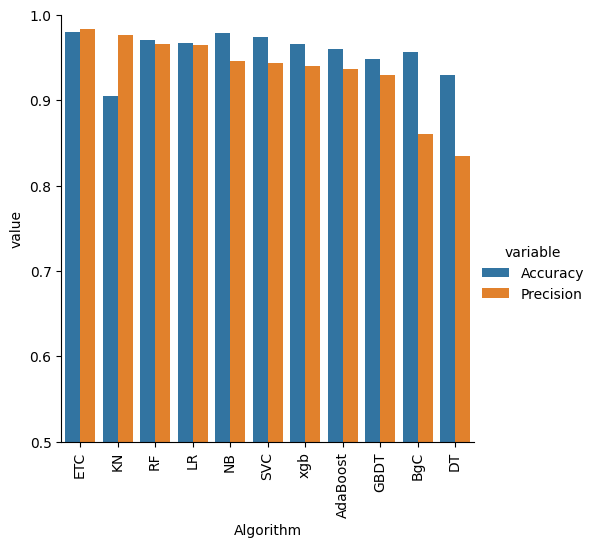

In [1258]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model Improvement

In [1259]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df 

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
8,ETC,0.980658,0.983607
1,KN,0.905222,0.976190
5,RF,0.970986,0.965517
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
0,SVC,0.973888,0.944000
10,xgb,0.966151,0.940171
6,AdaBoost,0.960348,0.936937
9,GBDT,0.948743,0.929293
7,BgC,0.956480,0.860465


In [1260]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
temp_df 

,Algorithm,Accuracy_scaling,Precision_scaling
8,ETC,0.980658,0.983607
1,KN,0.905222,0.976190
5,RF,0.970986,0.965517
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
0,SVC,0.973888,0.944000
10,xgb,0.966151,0.940171
6,AdaBoost,0.960348,0.936937
9,GBDT,0.948743,0.929293
7,BgC,0.956480,0.860465


In [1261]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df


,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,ETC,0.980658,0.983607,0.980658,0.983607
1,KN,0.905222,0.976190,0.905222,0.976190
2,RF,0.970986,0.965517,0.970986,0.965517
3,LR,0.967118,0.964286,0.967118,0.964286
4,NB,0.978723,0.946154,0.978723,0.946154
5,SVC,0.973888,0.944000,0.973888,0.944000
6,xgb,0.966151,0.940171,0.966151,0.940171
7,AdaBoost,0.960348,0.936937,0.960348,0.936937
8,GBDT,0.948743,0.929293,0.948743,0.929293
9,BgC,0.956480,0.860465,0.956480,0.860465


In [1262]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [1263]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [1264]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
1,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
2,RF,0.970986,0.965517,0.970986,0.965517,0.970986,0.965517,0.970986,0.965517
3,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286
4,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
5,SVC,0.973888,0.944000,0.973888,0.944000,0.973888,0.944000,0.973888,0.944000
6,xgb,0.966151,0.940171,0.966151,0.940171,0.966151,0.940171,0.966151,0.940171
7,AdaBoost,0.960348,0.936937,0.960348,0.936937,0.960348,0.936937,0.960348,0.936937
8,GBDT,0.948743,0.929293,0.948743,0.929293,0.948743,0.929293,0.948743,0.929293
9,BgC,0.956480,0.860465,0.956480,0.860465,0.956480,0.860465,0.956480,0.860465


In [1265]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [1266]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [1267]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [1268]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.968503937007874


In [1269]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [1270]:
from sklearn.ensemble import StackingClassifier


In [1271]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [1272]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9323308270676691


In [1273]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))